In [1]:
import pandas as pd
from IPython.display import Image

# Типы данных в pandas. Часть 2

# Тип данных 'category'

План урока

1. Количественные и категориальные переменные в статистике
2. Тип данных 'category' и три причины его использовать в DataFrame
3. Объект класса Categorical. Создание структур с набором категориальных данных
4. Практика

# 1. Количественные и категориальные переменные в статистике

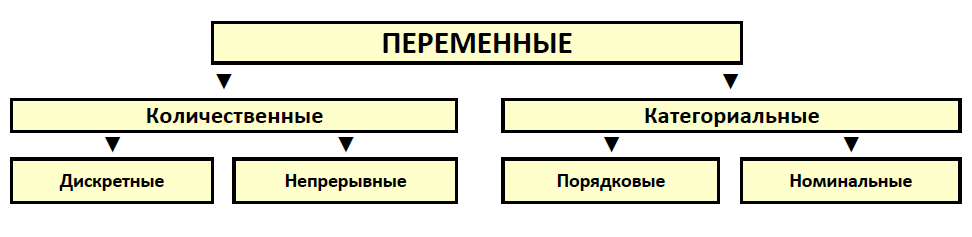

In [2]:
display(Image(filename='files/переменные.png'))

# Количественные переменные: 

- Рост человека
- Численность населения города
- Количество учеников в классе
- Количество квадратных метров в доме

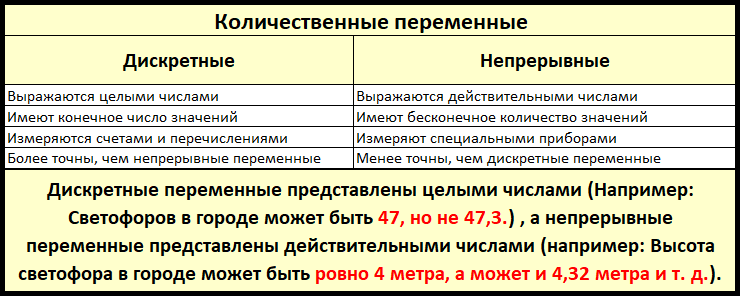

In [3]:
display(Image(filename='files/количественные_переменные.png'))

In [4]:
# Количественные переменные обычно выражены в типах данных int и float, но нередко прячутся в типе данных object
df_apt=pd.read_csv('files/квартиры')
df_apt

,Адрес,Кол-во проживающих,Площадь
0,ул. Фрунзе д.40 кв.35,2 чел.,35.5 кв.м
1,ул. Ленина д.50 к.2 кв.3,5 чел.,105 кв.м
2,ул. Дзержиского д.46 к.5. кв.5,3 чел.,76.4 кв.м


In [5]:
# все столбцы присланного файла имеют тип данных object
df_apt.dtypes

Адрес                 object
Кол-во проживающих    object
Площадь               object
dtype: object

In [6]:
# Приводим данные к необходимым типам, используя методы .replace() и .to_numeric()
df_apt['Кол-во проживающих'] = pd.to_numeric(df_apt['Кол-во проживающих'].apply(lambda x: x.replace('чел.', '').strip()))
df_apt['Площадь'] = pd.to_numeric(df_apt['Площадь'].apply(lambda x: x.replace('кв.м', '').strip()))

df_apt.dtypes

Адрес                  object
Кол-во проживающих      int64
Площадь               float64
dtype: object

In [7]:
df_apt

,Адрес,Кол-во проживающих,Площадь
0,ул. Фрунзе д.40 кв.35,2,35.5
1,ул. Ленина д.50 к.2 кв.3,5,105.0
2,ул. Дзержиского д.46 к.5. кв.5,3,76.4


# Категориальные переменные / качественные признаки: 

- Пол (мужской, женский)
- Цвет (красный, оранжевый, желтый, зеленый, голубой, синий, фиолетовый)
- Уровень в игре (легкий, средний, сложный)
- Уровень образования (начальное, среднее, средне-специальное, высшее)

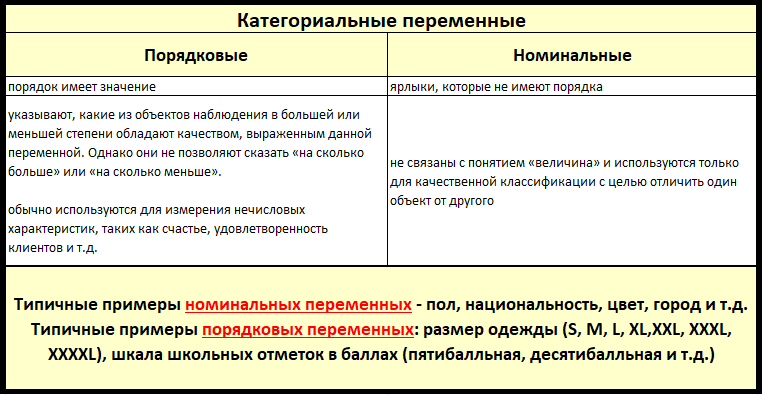

In [8]:
display(Image(filename='files/категориальные_переменные.png'))

# 2. Тип данных 'category'

## Преимущества:

- Объем занимаемой памяти
- Возможность установить порядок (для порядковых категорий)
- Облегчение работы библиотек машинного обучения

# 3. Создание структуры с набором категориальных данных

# 1 Способ (используем dtype='category')

In [9]:
# создаем простую структуру Series (dtype: object)
s = pd.Series(['красный', 'красный', 'зеленый', 'голубой'])
s

0    красный
1    красный
2    зеленый
3    голубой
dtype: object

In [10]:
# Прописываем dtype='category'
s_colors = pd.Series(['красный', 'красный', 'зеленый', 'голубой'], dtype='category')
s_colors

0    красный
1    красный
2    зеленый
3    голубой
dtype: category
Categories (3, object): ['голубой', 'зеленый', 'красный']

# 2 Способ (используем объект класса Categorical)

### pd.Categorical (values, categories=None, ordered=None...)

### - values: список, элементы данных
### - categories: набор уникальных значений, которые может принимать элемент категории
### - ordered: определяет, является категория порядковой или нет (True или False).

In [11]:
# создаем объект класса Categorical
cat_colors = pd.Categorical(['красный', 'зеленый', 'зеленый', 'голубой', 'красный'])
print(type(cat_colors))

cat_colors

<class 'pandas.core.arrays.categorical.Categorical'>


['красный', 'зеленый', 'зеленый', 'голубой', 'красный']
Categories (3, object): ['голубой', 'зеленый', 'красный']

In [12]:
# Зададим категорию явно через параметр categories:
cat_colors2 = pd.Categorical(['красный', 'зеленый', 'зеленый', 'голубой', 'красный'], 
                             categories=['красный','зеленый', 'голубой'])
cat_colors2

['красный', 'зеленый', 'зеленый', 'голубой', 'красный']
Categories (3, object): ['красный', 'зеленый', 'голубой']

In [13]:
# Если в наборе данных будут присутствовать элементы, которые не входят в категорию, им будут присвоены значения NaN:
cat_colors3 = pd.Categorical(['красный', 'зеленый', 'зеленый', 'голубой', 'красный', 'желтый', 'оранжевый'], 
                        categories=['красный','зеленый', 'голубой'])
cat_colors3

['красный', 'зеленый', 'зеленый', 'голубой', 'красный', NaN, NaN]
Categories (3, object): ['красный', 'зеленый', 'голубой']

In [14]:
print(type(cat_colors3))
# Передаем объект Categorical в коструктор класса Series параметром data
# На выходе получаем серию с типом данных 'category'
s_colors2 = pd.Series(cat_colors3)
s_colors2

<class 'pandas.core.arrays.categorical.Categorical'>


0    красный
1    зеленый
2    зеленый
3    голубой
4    красный
5        NaN
6        NaN
dtype: category
Categories (3, object): ['красный', 'зеленый', 'голубой']

In [15]:
# Для очистки данных от пропущенных значений используем метод .dropna():
s_colors2 = pd.Series(s_colors2).dropna()
s_colors2

0    красный
1    зеленый
2    зеленый
3    голубой
4    красный
dtype: category
Categories (3, object): ['красный', 'зеленый', 'голубой']

# Работа со структурой DataFrame

In [16]:
# Cоздаем DataFrame с категориальными данными:
# в конструкторе класса прописываем dtype='category'
df_colors = pd.DataFrame({'eye_color':['blue', 'grey', 'green'], 'hair_color':['brown', 'black', 'red']}, dtype='category')
df_colors

,eye_color,hair_color
0,blue,brown
1,grey,black
2,green,red


In [17]:
# dtype='category'
df_colors.dtypes

eye_color     category
hair_color    category
dtype: object

# Порядковые категории

In [18]:
# определяем порядок с помощью параметра ordered=True
# Если не укажем параметр ordered=True, то нельзя будет выполнить поиск минимального и максимального элемента
size = pd.Categorical(['s', 'xs', 'm', 'xl','l'], categories=['xs','s','m', 'l', 'xl'], ordered=True)
size

['s', 'xs', 'm', 'xl', 'l']
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

In [19]:
# В последней строчке указано как соотносятся между собой значения элементов категории в отношении “больше-меньше”
# Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

In [20]:
# Eсли если вместе с параметром ordered=True мы не укажем порядок в параметре categories, то порядок будет алфавитный
level1 = pd.Categorical(['g', 'd', 'b', 'c','n'], ordered=True)
level1

['g', 'd', 'b', 'c', 'n']
Categories (5, object): ['b' < 'c' < 'd' < 'g' < 'n']

In [21]:
# Если вместе с параметром ordered=True мы не укажем порядок в параметре categories, то порядок будет от меньшего к большему
level2 = pd.Categorical(['уровень 1', 'уровень 4', 'уровень 2', 'уровень 3','уровень 7'], ordered=True)
level2

['уровень 1', 'уровень 4', 'уровень 2', 'уровень 3', 'уровень 7']
Categories (5, object): ['уровень 1' < 'уровень 2' < 'уровень 3' < 'уровень 4' < 'уровень 7']

In [22]:
# Если вместе с параметром ordered=True мы не укажем порядок в параметре categories, то порядок будет от меньшего к большему
level3 = pd.Categorical([1, 4, 2, 3, 7], ordered=True)
level3

[1, 4, 2, 3, 7]
Categories (5, int64): [1 < 2 < 3 < 4 < 7]

In [23]:
# Для непорядковых категорий запрещены сравнения на уровне объектов

c1 = pd.Series(pd.Categorical(['зеленый', 'зеленый', 'голубой','красный','голубой'], 
                              categories=['красный', 'зеленый', 'голубой'], ordered=False))
c2 = pd.Series(pd.Categorical(['красный','красный', 'зеленый', 'голубой','зеленый'], 
                              categories=['красный', 'зеленый', 'голубой'], ordered=False))

In [24]:
# Такое сравнение выдаст ошибку
#c1 > c2

In [25]:
v1 = pd.Series(pd.Categorical(['s', 'm', 'l','xl', 's', 'xs'], categories=['xs','s','m', 'l', 'xl'], ordered=True))
v2 = pd.Series(pd.Categorical(['xs', 'l', 's', 'm', 's', 'xl'], categories=['xs','s','m', 'l', 'xl'], ordered=True))
v1 > v2

0     True
1    False
2     True
3     True
4    False
5    False
dtype: bool

# Практика

In [26]:
# Откроем файл 'people' с различными количественными и качественными характеристиками десяти людей
df1=pd.read_csv('files/people')
df1

,Имя,Возраст,Рост,Пол,Национальность,Цвет волос,Цвет глаз,Образование,Тест
0,Гедеон Леви,14,1.60,М,еврей,черный,зеленый,основное общее,48
1,Патрик Бреннан,18,1.75,М,ирландец,рыжий,голубой,среднее общее,72
2,Захар Овчинников,70,1.72,М,русский,русый,серый,среднее профессиональное,65
3,Нкиру Нзегву,45,1.67,Ж,нигерийка,черный,черный,высшее (бакалавриат),75
4,Амели Лажуа,26,1.80,Ж,француженка,блонд,голубой,высшее (специалитет/магистратура),88
5,Хавьер Мартинес,8,1.30,М,испанец,темно-русый,карий,начальное общее,23
6,Том Дэвис,40,1.92,М,англичанин,светло-русый,серый,кандидат наук,80
7,Бакир Кхалед,58,1.76,М,сириец,темно-русый,голубой,доктор наук,90
8,Джи Чанг,21,1.55,Ж,китаянка,черный,черный,среднее общее,85
9,Ахана Джа,89,1.69,Ж,индианка,черный,зеленый,среднее общее,60


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Имя             10 non-null     object 
 1   Возраст         10 non-null     int64  
 2   Рост            10 non-null     float64
 3   Пол             10 non-null     object 
 4   Национальность  10 non-null     object 
 5   Цвет волос      10 non-null     object 
 6   Цвет глаз       10 non-null     object 
 7   Образование     10 non-null     object 
 8   Тест            10 non-null     int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 852.0+ bytes


In [28]:
# изменяем тип данных колонок ('Пол', 'Цвет волос', 'Цвет глаз') с помощью метода .astype() в одну строчку:
df1=df1.astype({'Пол':'category','Цвет волос':'category','Цвет глаз':'category'})
df1.dtypes

Имя                 object
Возраст              int64
Рост               float64
Пол               category
Национальность      object
Цвет волос        category
Цвет глаз         category
Образование         object
Тест                 int64
dtype: object

In [29]:
# создаем разными способами две дополнительные структуры с категориальным типом данных и добавляем их в датафрейм df1
blood = pd.Series(['0(I)', 'A(II)', 'A(II)', 'A(II)', 'B(III)','A(II)', '0(I)', 'AB(IV)', 'A(II)', 'B(III)'], dtype='category')
blood_rh = pd.Categorical(['Rh+', 'Rh-', 'Rh+', 'Rh+', 'Rh+', 'Rh+', 'Rh-', 'Rh-', 'Rh+', 'Rh-'])

df1['Группа крови']=blood
df1 ['Резус']=blood_rh

df1

,Имя,Возраст,Рост,Пол,Национальность,Цвет волос,Цвет глаз,Образование,Тест,Группа крови,Резус
0,Гедеон Леви,14,1.60,М,еврей,черный,зеленый,основное общее,48,0(I),Rh+
1,Патрик Бреннан,18,1.75,М,ирландец,рыжий,голубой,среднее общее,72,A(II),Rh-
2,Захар Овчинников,70,1.72,М,русский,русый,серый,среднее профессиональное,65,A(II),Rh+
3,Нкиру Нзегву,45,1.67,Ж,нигерийка,черный,черный,высшее (бакалавриат),75,A(II),Rh+
4,Амели Лажуа,26,1.80,Ж,француженка,блонд,голубой,высшее (специалитет/магистратура),88,B(III),Rh+
5,Хавьер Мартинес,8,1.30,М,испанец,темно-русый,карий,начальное общее,23,A(II),Rh+
6,Том Дэвис,40,1.92,М,англичанин,светло-русый,серый,кандидат наук,80,0(I),Rh-
7,Бакир Кхалед,58,1.76,М,сириец,темно-русый,голубой,доктор наук,90,AB(IV),Rh-
8,Джи Чанг,21,1.55,Ж,китаянка,черный,черный,среднее общее,85,A(II),Rh+
9,Ахана Джа,89,1.69,Ж,индианка,черный,зеленый,среднее общее,60,B(III),Rh-


In [30]:
df1.dtypes

Имя                 object
Возраст              int64
Рост               float64
Пол               category
Национальность      object
Цвет волос        category
Цвет глаз         category
Образование         object
Тест                 int64
Группа крови      category
Резус             category
dtype: object

In [31]:
# Извлекаем уникальные значения столбца датафрейма df1 с помощью метода unique
# на выходе получаем список
df1['Образование'].unique()

array(['основное общее', 'среднее общее', 'среднее профессиональное',
       'высшее (бакалавриат)', 'высшее (специалитет/магистратура)',
       'начальное общее', 'кандидат наук', 'доктор наук'], dtype=object)

In [32]:
# Чтобы узнать, сколько уникальных значений в столбце датафрейма используем специальный метод nunique()
# также количество уникальных значений можно посмотреть так: len(df1['Образование'].unique())

df1['Образование'].nunique()

8

In [33]:
df1['Образование'] = pd.Categorical(df1['Образование'],
                                    categories=['начальное общее', 'основное общее', 'среднее общее', 
                                                'среднее профессиональное','высшее (бакалавриат)', 
                                                'высшее (специалитет/магистратура)', 'кандидат наук', 'доктор наук'], 
                                    ordered=True)
df1['Образование']

0                       основное общее
1                        среднее общее
2             среднее профессиональное
3                 высшее (бакалавриат)
4    высшее (специалитет/магистратура)
5                      начальное общее
6                        кандидат наук
7                          доктор наук
8                        среднее общее
9                        среднее общее
Name: Образование, dtype: category
Categories (8, object): ['начальное общее' < 'основное общее' < 'среднее общее' < 'среднее профессиональное' < 'высшее (бакалавриат)' < 'высшее (специалитет/магистратура)' < 'кандидат наук' < 'доктор наук']

In [34]:
df1

,Имя,Возраст,Рост,Пол,Национальность,Цвет волос,Цвет глаз,Образование,Тест,Группа крови,Резус
0,Гедеон Леви,14,1.60,М,еврей,черный,зеленый,основное общее,48,0(I),Rh+
1,Патрик Бреннан,18,1.75,М,ирландец,рыжий,голубой,среднее общее,72,A(II),Rh-
2,Захар Овчинников,70,1.72,М,русский,русый,серый,среднее профессиональное,65,A(II),Rh+
3,Нкиру Нзегву,45,1.67,Ж,нигерийка,черный,черный,высшее (бакалавриат),75,A(II),Rh+
4,Амели Лажуа,26,1.80,Ж,француженка,блонд,голубой,высшее (специалитет/магистратура),88,B(III),Rh+
5,Хавьер Мартинес,8,1.30,М,испанец,темно-русый,карий,начальное общее,23,A(II),Rh+
6,Том Дэвис,40,1.92,М,англичанин,светло-русый,серый,кандидат наук,80,0(I),Rh-
7,Бакир Кхалед,58,1.76,М,сириец,темно-русый,голубой,доктор наук,90,AB(IV),Rh-
8,Джи Чанг,21,1.55,Ж,китаянка,черный,черный,среднее общее,85,A(II),Rh+
9,Ахана Джа,89,1.69,Ж,индианка,черный,зеленый,среднее общее,60,B(III),Rh-
